<a href="https://colab.research.google.com/github/azme10/Real-Time-Fraud-Detection-in-Credit-Card-Transactions-Using-Advanced-Machine-Learning-Techniques/blob/main/FraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d mlg-ulb/creditcardfraud
!unzip creditcardfraud.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 99% 65.0M/66.0M [00:00<00:00, 114MB/s] 
100% 66.0M/66.0M [00:00<00:00, 103MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
import pandas as pd
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

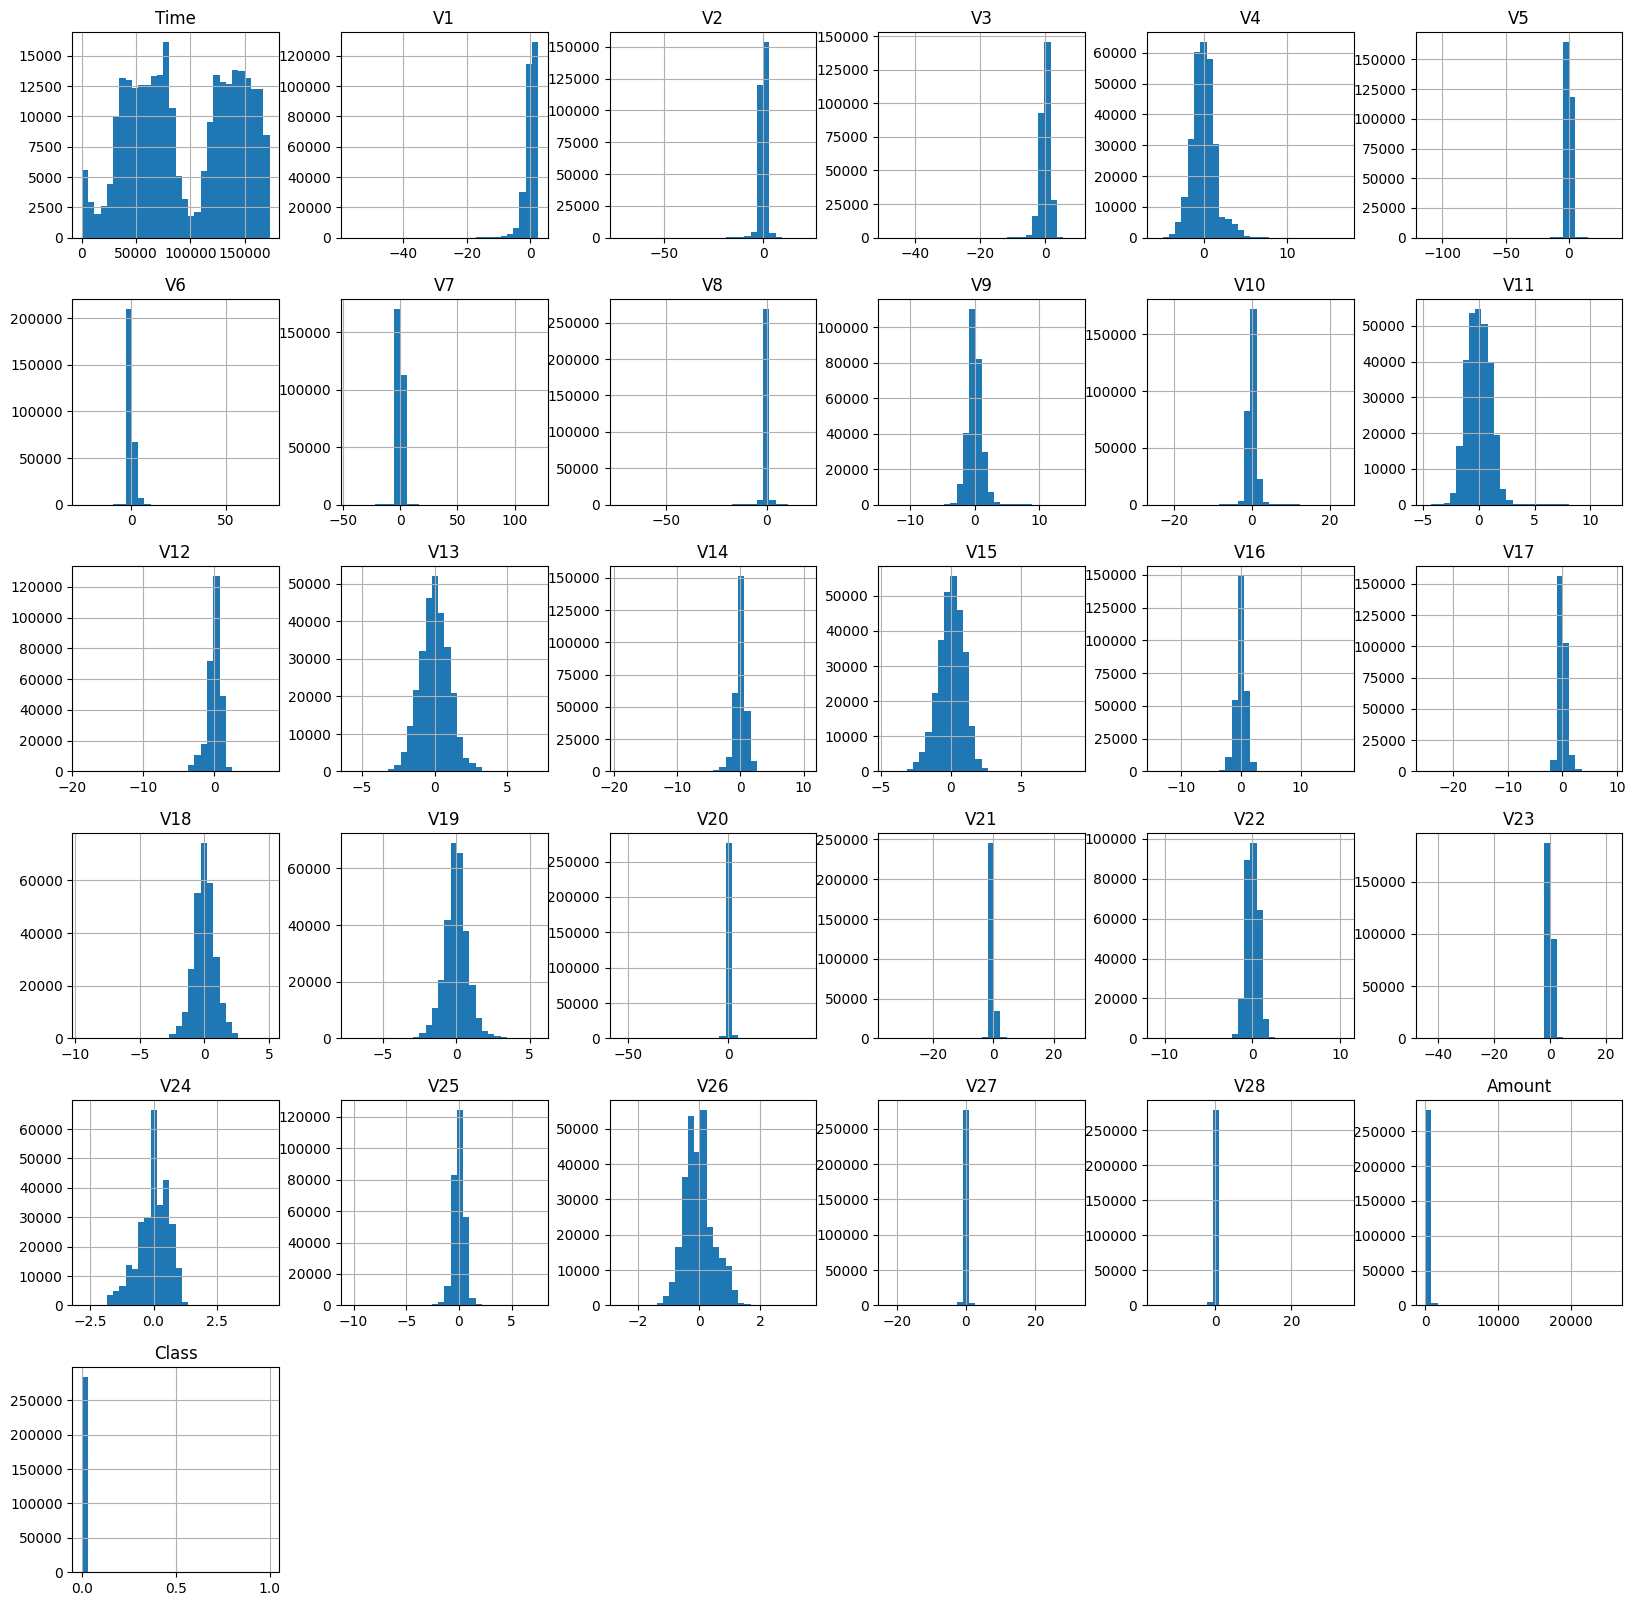

In [ ]:
df.hist(bins=30,figsize=(20,20))

In [ ]:
df.duplicated().any()

True

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
new_df = df.copy()
new_df['Amount'] = RobustScaler().fit_transform(new_df['Amount'].to_numpy().reshape(-1, 1))

<Axes: >

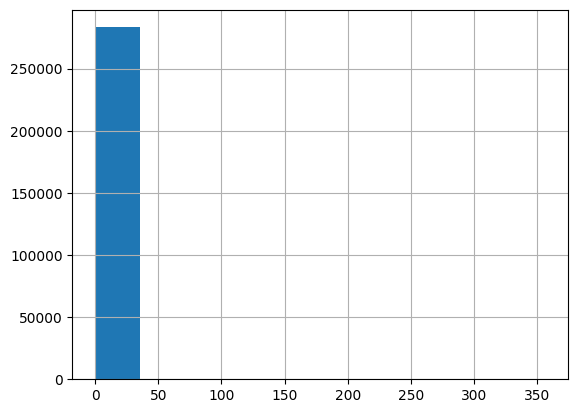

In [ ]:
new_df['Amount'].hist()

In [ ]:
new_df['Amount'].describe()

,Amount
count,283726.000000
mean,0.924387
std,3.482123
min,-0.305938
25%,-0.228063
50%,0.000000
75%,0.771937
max,356.962314


In [ ]:
time = new_df['Time']
new_df['Time'] = (time - time.min()) / (time.max() - time.min())
new_df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.774718,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.268530,0
2,0.000006,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.959811,0
3,0.000006,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.411487,0
4,0.000012,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.667362,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,0.999965,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.295230,0
284803,0.999971,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038798,0
284804,0.999977,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.638020,0
284805,0.999977,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.166875,0


In [ ]:
new_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,...,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000,283726.000000
mean,0.548701,0.005917,-0.004135,0.001613,-0.002966,0.001828,-0.001139,0.001801,-0.000854,-0.001596,...,-0.000371,-0.000015,0.000198,0.000214,-0.000232,0.000149,0.001763,0.000547,0.924387,0.001667
std,0.274787,1.948026,1.646703,1.508682,1.414184,1.377008,1.331931,1.227664,1.179054,1.095492,...,0.723909,0.724550,0.623702,0.605627,0.521220,0.482053,0.395744,0.328027,3.482123,0.040796
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,-0.305938,0.000000
25%,0.313699,-0.915951,-0.600321,-0.889682,-0.850134,-0.689830,-0.769031,-0.552509,-0.208828,-0.644221,...,-0.228305,-0.542700,-0.161703,-0.354453,-0.317485,-0.326763,-0.070641,-0.052818,-0.228063,0.000000
50%,0.490141,0.020384,0.063949,0.179963,-0.022248,-0.053468,-0.275168,0.040859,0.021898,-0.052596,...,-0.029441,0.006675,-0.011159,0.041016,0.016278,-0.052172,0.001479,0.011288,0.000000,0.000000
75%,0.806160,1.316068,0.800283,1.026960,0.739647,0.612218,0.396792,0.570474,0.325704,0.595977,...,0.186194,0.528245,0.147748,0.439738,0.350667,0.240261,0.091208,0.078276,0.771937,0.000000
max,1.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,356.962314,1.000000


In [ ]:
train_size = int(0.7 * len(new_df))
test_size = int(0.15 * len(new_df))

train = new_df[:train_size]
test = new_df[train_size:train_size + test_size]
val = new_df[train_size + test_size:]
train['Class'].value_counts(), test['Class'].value_counts(), val['Class'].value_counts()

(Class
 0    198242
 1       366
 Name: count, dtype: int64,
 Class
 0    42503
 1       55
 Name: count, dtype: int64,
 Class
 0    42508
 1       52
 Name: count, dtype: int64)

In [ ]:
x_test = test.drop('Class', axis=1)
y_test = test['Class']
x_val = val.drop('Class', axis=1)
y_val = val['Class']

In [ ]:
x_train = train.drop('Class', axis=1)
y_train = train['Class']


# Classification part

Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(x_train, y_train)
logistic_model.score(x_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9990332715701281

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_val, logistic_model.predict(x_val), target_names=['Not Fraud', 'Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     42508
       Fraud       0.75      0.52      0.61        52

    accuracy                           1.00     42560
   macro avg       0.87      0.76      0.81     42560
weighted avg       1.00      1.00      1.00     42560



# Deep Neural Networks:

1-Shallow Neural Network:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report, accuracy_score, f1_score

shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))

# Update the filepath to end with .keras
checkpoint = ModelCheckpoint('shallow_nn.keras', save_best_only=True)

shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn.summary()
shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=[checkpoint])

def neural_net_predictions(model, x):
    return (model.predict(x).flatten() > 0.5).astype(int)

y_test_pred = neural_net_predictions(shallow_nn, x_test)

print(classification_report(y_test, y_test_pred, target_names=['Not Fraud', 'Fraud'],digits=4))
average_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Average Accuracy: {average_accuracy}')
average_f1_score = f1_score(y_test, y_test_pred)
print(f'Average F1 Score: {average_f1_score}')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 2)                   │              62 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 73 (292.00 B)

 Trainable params: 69 (276.00 B)

 Non-trainable params: 4 (16.00 B)

Epoch 1/5
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 24s 4ms/step - accuracy: 0.9596 - loss: 0.1857 - val_accuracy: 0.9994 - val_loss: 0.0035
Epoch 2/5
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9991 - loss: 0.0041 - val_accuracy: 0.9995 - val_loss: 0.0030
Epoch 3/5
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9996 - val_loss: 0.0028
Epoch 4/5
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.9994 - loss: 0.0031 - val_accuracy: 0.9996 - val_loss: 0.0028
Epoch 5/5
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9993 - loss: 0.0034 - val_accuracy: 0.9996 - val_loss: 0.0027
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

   Not Fraud     0.9997    0.9999    0.9998     42503
       Fraud     0.8936    0.7636    0.8235        55

    accuracy                         0.9996     42558
   macro avg     0.9467    0.8818    0.9117     42558
weighted avg     0.9996    0.9996  

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import classification_report
shallow_nn = Sequential()
shallow_nn.add(InputLayer((x_train.shape[1],)))
shallow_nn.add(Dense(2, 'relu'))
shallow_nn.add(BatchNormalization())
shallow_nn.add(Dense(1, 'sigmoid'))
checkpoint = ModelCheckpoint('shallow_nn', save_best_only=True)

shallow_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
shallow_nn.summary()
history = shallow_nn.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=5, callbacks=[checkpoint])


# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

def neural_net_predictions(model, x):
    return (model.predict(x).flatten() > 0.5).astype(int)

# Make predictions on the test set
y_test_pred = neural_net_predictions(shallow_nn, x_test)

# Print the classification report for the test set
print(classification_report(y_test, y_test_pred, target_names=['Not Fraud', 'Fraud']))

average_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Average Accuracy: {average_accuracy}')

# Calculate and print the average F1 score for the test set
average_f1_score = f1_score(y_test, y_test_pred)
print(f'Average F1 Score: {average_f1_score}')


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=shallow_nn


2-Convolutional neural network:CNN


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 28, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 12, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 384)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 128)                 │          49,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,745 (217.75 KB)

 Trainable params: 55,745 (217.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 45s 7ms/step - accuracy: 0.9982 - loss: 0.0160 - val_accuracy: 0.9996 - val_loss: 0.0031
Epoch 2/5
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9992 - loss: 0.0042 - val_accuracy: 0.9995 - val_loss: 0.0036
Epoch 3/5
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 79s 6ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 4/5
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 42s 7ms/step - accuracy: 0.9993 - loss: 0.0041 - val_accuracy: 0.9996 - val_loss: 0.0034
Epoch 5/5
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - accuracy: 0.9993 - loss: 0.0038 - val_accuracy: 0.9994 - val_loss: 0.0036
1330/1330 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
              precision    recall  f1-score   support

   Not Fraud     0.9998    0.9997    0.9997     42503
       Fraud     0.7667    0.8364    0.8000        55

    accuracy                         0.9995     42558
   macro avg     0.8832    0.9180    0.8999     42558
weighted avg     0.9995    0.9995  

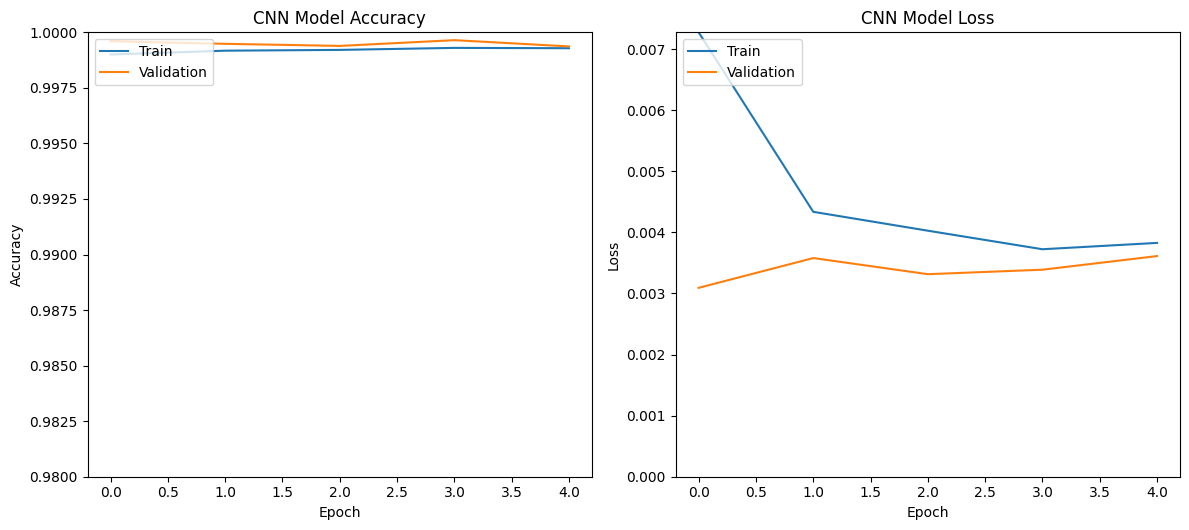

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.metrics import accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt

x_train_cnn = x_train.values.reshape(x_train.shape[0], x_train.shape[1], 1)
x_val_cnn = x_val.values.reshape(x_val.shape[0], x_val.shape[1], 1)
x_test_cnn = x_test.values.reshape(x_test.shape[0], x_test.shape[1], 1)

# Define the CNN model
cnn_model = Sequential([
    Conv1D(32, 3, activation='relu', input_shape=(x_train.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 3, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
checkpoint_cnn = ModelCheckpoint('cnn_model.keras', save_best_only=True)
cnn_model.summary()

history_cnn = cnn_model.fit(x_train_cnn, y_train, validation_data=(x_val_cnn, y_val), epochs=5, callbacks=[checkpoint_cnn])

def cnn_predictions(model, x):
    return (model.predict(x).flatten() > 0.5).astype(int)

# Make predictions on the test set
y_test_pred_cnn = cnn_predictions(cnn_model, x_test_cnn)

print(classification_report(y_test, y_test_pred_cnn, target_names=['Not Fraud', 'Fraud'],digits=4))

average_accuracy_cnn = accuracy_score(y_test, y_test_pred_cnn)
print(f'Average Accuracy (CNN): {average_accuracy_cnn:.4f}')

average_f1_score_cnn = f1_score(y_test, y_test_pred_cnn)
print(f'Average F1 Score (CNN): {average_f1_score_cnn:.4f}')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.ylim(0.98, 1.0)  # Adjust y-axis limits for accuracy
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.ylim(0.0, max(history_cnn.history['loss'] + [max(history_cnn.history['val_loss'])]))  # Adjust y-axis limits for loss
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout(rect=[0, 0.05, 1, 0.95])  # Adjust the layout to make the plots appear at the top
plt.show()